In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [4]:
churn=pd.read_csv("/content/churn_data.csv")
customer=pd.read_csv("/content/customer_data.csv")
internet=pd.read_csv("/content/internet_data.csv")

In [5]:
df1= pd.merge(churn, customer, how='inner', on='customerID')

In [6]:
df = pd.merge(df1, internet, how='inner', on = 'customerID')

In [7]:
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [8]:
df.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7042.000000,7042.000000,7042.000000
mean,32.366373,64.755886,0.162170
std,24.557955,30.088238,0.368633
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7042 entries, 0 to 7041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7042 non-null   object 
 1   tenure            7042 non-null   int64  
 2   PhoneService      7042 non-null   object 
 3   Contract          7042 non-null   object 
 4   PaperlessBilling  7042 non-null   object 
 5   PaymentMethod     7042 non-null   object 
 6   MonthlyCharges    7042 non-null   float64
 7   TotalCharges      7042 non-null   object 
 8   Churn             7042 non-null   object 
 9   gender            7042 non-null   object 
 10  SeniorCitizen     7042 non-null   int64  
 11  Partner           7042 non-null   object 
 12  Dependents        7042 non-null   object 
 13  MultipleLines     7042 non-null   object 
 14  InternetService   7042 non-null   object 
 15  OnlineSecurity    7042 non-null   object 
 16  OnlineBackup      7042 non-null   object 


In [10]:
df.isnull().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [11]:
df['TotalCharges'].str.isspace().value_counts()

False    7031
True       11
Name: TotalCharges, dtype: int64

In [12]:
df['TotalCharges'].isnull().sum()

0

In [13]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [14]:
df['TotalCharges'].isnull().sum()

11

In [15]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(),inplace=True)

In [16]:
df['TotalCharges'].isnull().sum()

0

<AxesSubplot:xlabel='Contract', ylabel='count'>

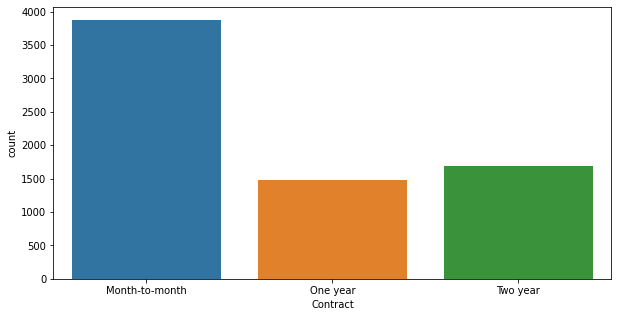

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Contract', data=df)

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

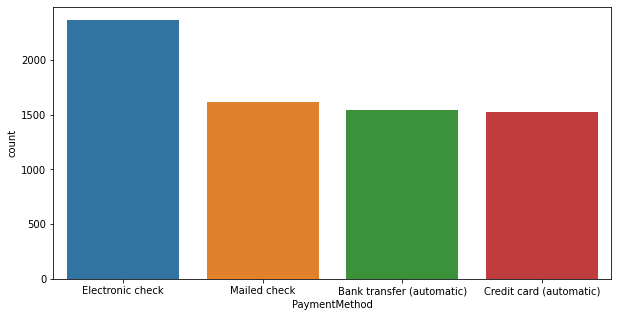

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'PaymentMethod', data=df)


<AxesSubplot:xlabel='Churn', ylabel='count'>

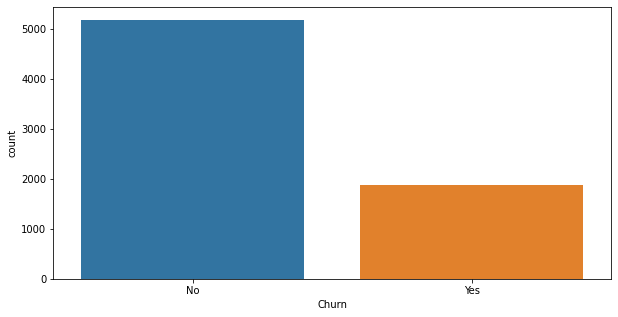

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Churn', data=df)

<AxesSubplot:xlabel='gender', ylabel='count'>

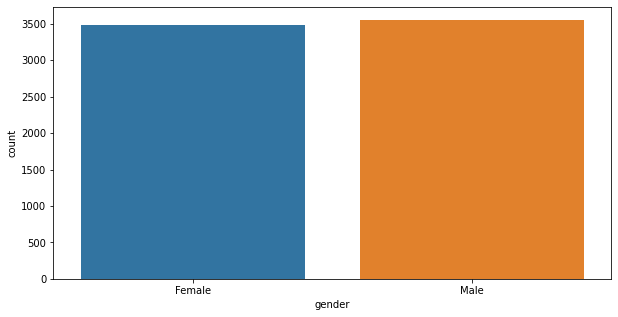

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'gender', data=df)

In [21]:
pd.set_option('display.max_columns', 100)
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


one hot


In [22]:
df2 = ['PhoneService','PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# With .map method and lambda function turning Yes/No into 1/0
df[df2] = df[df2].apply(lambda x:x.map({'Yes': 1, "No": 0}))
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No


In [23]:
df['StreamingMovies'].value_counts()

No                     2785
Yes                    2731
No internet service    1526
Name: StreamingMovies, dtype: int64

In [24]:
df

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,72,1,Two year,1,Bank transfer (automatic),21.15,1419.40,0,Female,0,0,0,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
7038,6840-RESVB,24,1,One year,1,Mailed check,84.80,1990.50,0,Male,0,1,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,72,1,One year,1,Credit card (automatic),103.20,7362.90,0,Female,0,1,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,11,0,Month-to-month,1,Electronic check,29.60,346.45,0,Female,0,1,1,No phone service,DSL,Yes,No,No,No,No,No


In [25]:
le=LabelEncoder()

In [26]:
df['Contract']=le.fit_transform(df['Contract'])
df['PaymentMethod']=le.fit_transform(df['PaymentMethod'])
df['gender']=le.fit_transform(df['gender'])
df['MultipleLines']=le.fit_transform(df['MultipleLines'])
df['InternetService']=le.fit_transform(df['InternetService'])
df['OnlineSecurity']=le.fit_transform(df['OnlineSecurity'])
df['DeviceProtection']=le.fit_transform(df['DeviceProtection'])
df['TechSupport']=le.fit_transform(df['TechSupport'])
df['StreamingTV']=le.fit_transform(df['StreamingTV'])
df['StreamingMovies']=le.fit_transform(df['StreamingMovies'])
df['OnlineBackup']=le.fit_transform(df['OnlineBackup'])


In [27]:
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,0,1,2,29.85,29.85,0,0,0,1,0,1,0,0,2,0,0,0,0
1,5575-GNVDE,34,1,1,0,3,56.95,1889.50,0,1,0,0,0,0,0,2,0,2,0,0,0
2,3668-QPYBK,2,1,0,1,3,53.85,108.15,1,1,0,0,0,0,0,2,2,0,0,0,0
3,7795-CFOCW,45,0,1,0,0,42.30,1840.75,0,1,0,0,0,1,0,2,0,2,2,0,0
4,9237-HQITU,2,1,0,1,2,70.70,151.65,1,0,0,0,0,0,1,0,0,0,0,0,0


In [28]:
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,0,1,2,29.85,29.85,0,0,0,1,0,1,0,0,2,0,0,0,0
1,5575-GNVDE,34,1,1,0,3,56.95,1889.50,0,1,0,0,0,0,0,2,0,2,0,0,0
2,3668-QPYBK,2,1,0,1,3,53.85,108.15,1,1,0,0,0,0,0,2,2,0,0,0,0
3,7795-CFOCW,45,0,1,0,0,42.30,1840.75,0,1,0,0,0,1,0,2,0,2,2,0,0
4,9237-HQITU,2,1,0,1,2,70.70,151.65,1,0,0,0,0,0,1,0,0,0,0,0,0


In [29]:
df.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [30]:
X = df.drop(['Churn','customerID'], axis=1)
y = df['Churn']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [33]:
X_train.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
877,51,0,1,0,0,60.15,3077.00,0,0,0,1,1,0,2,0,2,2,2,2
5791,63,1,0,1,2,102.40,6444.05,1,0,1,0,2,1,0,2,2,0,2,2
5334,49,1,2,1,0,107.95,5293.20,0,0,1,1,2,1,0,2,2,2,2,2
878,60,1,1,0,2,64.75,4039.50,0,0,0,0,2,0,2,0,2,2,0,0
6577,70,1,2,0,0,72.95,5265.55,1,0,1,0,2,0,0,2,2,2,2,0


In [34]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [35]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import pandas as pd

In [36]:

model = keras.Sequential([
    keras.layers.Dense(15, input_dim=X_train.shape[1], activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [37]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
78/78 [==============================] - 2s 3ms/step - loss: 0.5886 - accuracy: 0.6825
Epoch 2/100
78/78 [==============================] - 0s 2ms/step - loss: 0.4709 - accuracy: 0.7458
Epoch 3/100
78/78 [==============================] - 0s 2ms/step - loss: 0.4426 - accuracy: 0.7845
Epoch 4/100
78/78 [==============================] - 0s 3ms/step - loss: 0.4317 - accuracy: 0.7949
Epoch 5/100
78/78 [==============================] - 0s 2ms/step - loss: 0.4249 - accuracy: 0.8010
Epoch 6/100
78/78 [==============================] - 0s 3ms/step - loss: 0.4204 - accuracy: 0.7965
Epoch 7/100
78/78 [==============================] - 0s 3ms/step - loss: 0.4159 - accuracy: 0.8067
Epoch 8/100
78/78 [==============================] - 0s 2ms/step - loss: 0.4124 - accuracy: 0.8075
Epoch 9/100
78/78 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.8069
Epoch 10/100
78/78 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.8065
Epoch 11/

In [50]:
accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

67/67 [==============================] - 0s 4ms/step - loss: 0.4679 - accuracy: 0.7738
Accuracy: [0.4678781032562256, 0.7737813591957092]


In [40]:
import pickle

In [43]:
pickle.dump(accuracy , open('model.pkl','wb'))

In [44]:
model_pkl=pickle.load(open('model.pkl','rb'))

In [48]:
model_pkl

[0.4678781032562256, 0.7737813591957092]